# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data

In [2]:
X = np.loadtxt('data_clustering.txt', delimiter=',')
num_clusters = 5

# Plot input data

([], [])

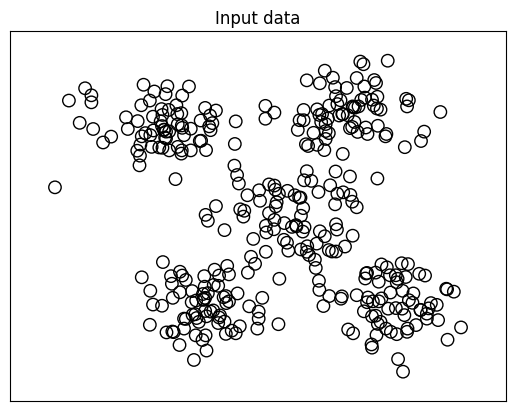

In [ ]:
plt.figure()
plt.scatter(
      X[:,0]
    , X[:,1]
    , marker='o'
    , facecolors='none'
    , edgecolors='black'
    , s=80
)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object 
We can visually see that there are five groups within this data. Create the ```KMeans``` object
using the initialization parameters. The ```init``` parameter represents the method of
initialization to select the initial centers of clusters. Instead of selecting them randomly, we
use ```k-means++``` to select these centers in a smarter way. This ensures that the algorithm
converges quickly. The ```n_clusters``` parameter refers to the number of clusters. The
```n_init``` parameter refers to the number of times the algorithm should run before deciding
upon the best outcome:

In [4]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model

In [5]:
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


# Step size of the mesh
To visualize the boundaries, we need to create a grid of points and evaluate the model on
all those points. Let's define the step size of this grid:

In [6]:
step_size = 0.01

# Define the grid of points to plot the boundaries
We define the grid of points and ensure that we are covering all the values in our input
data:

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(
    np.arange(x_min, x_max, step_size), 
    np.arange(y_min, y_max, step_size)
)

# Predict output labels for all the points on the grid 

In [8]:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them 

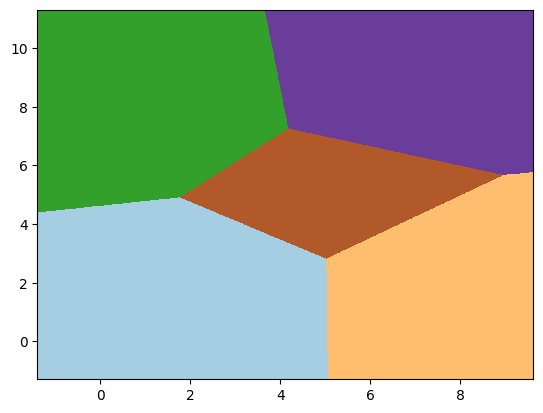

In [9]:
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(
      output
    , interpolation='nearest'
    , extent=(
          x_vals.min()
        , x_vals.max()
        , y_vals.min()
        , y_vals.max()
    )
    , cmap=plt.cm.Paired
    , aspect='auto'
    , origin='lower'
)

# Overlay input points

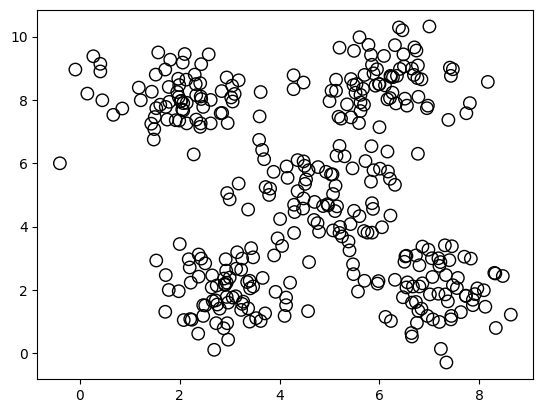

In [10]:
plt.scatter(
      X[:,0]
    , X[:,1]
    , marker='o'
    , facecolors='none'
    , edgecolors='black'
    , s=80
)

# Plot the centers of clusters

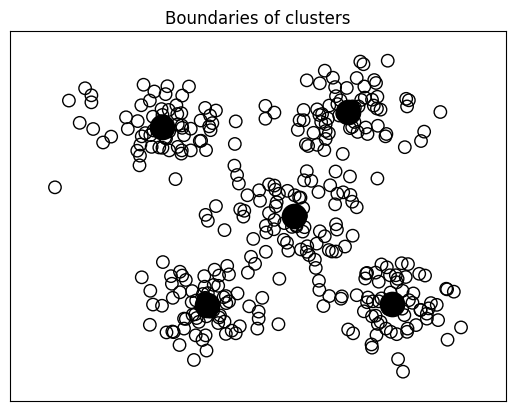

In [11]:
plt.scatter(
      X[:,0]
    , X[:,1]
    , marker='o'
    , facecolors='none'
    , edgecolors='black'
    , s=80
)
cluster_centers = kmeans.cluster_centers_
plt.scatter(
      cluster_centers[:,0]
    , cluster_centers[:,1]
    , marker='o'
    , s=210
    , linewidths=4
    , color='black'
    , zorder=12
    , facecolors='black'
)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

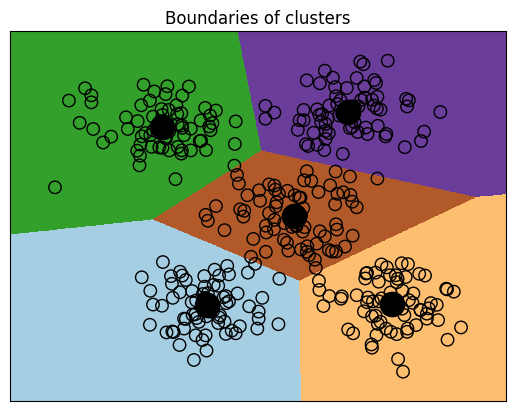

In [12]:
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(
      output
    , interpolation='nearest'
    , extent=(
          x_vals.min()
        , x_vals.max()
        , y_vals.min()
        , y_vals.max()
    )
    , cmap=plt.cm.Paired
    , aspect='auto'
    , origin='lower'
)
plt.scatter(
      X[:,0]
    , X[:,1]
    , marker='o'
    , facecolors='none'
    , edgecolors='black'
    , s=80
)
cluster_centers = kmeans.cluster_centers_
plt.scatter(
      cluster_centers[:,0]
    , cluster_centers[:,1]
    , marker='o'
    , s=210
    , linewidths=4
    , color='black'
    , zorder=12
    , facecolors='black'
)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()